In [1]:
import sys
sys.path.append('..')

import matplotlib.pyplot as plt
import numpy as np
import torch

import metrics
import utils

Autoencoders are neural network that perform non-linear dimensionality reduction.  
It's a multilayer neural network with a small central layer, that learns the identity function. This central layer is the learned representation.  

The first part, transforming the data to the central layer representation, is called the encoder, and the second part, reconstructing the data from the central layer representation, is called the decoder.

Epoch 1: Loss = 1757.8597412109375
Epoch 2: Loss = 1628.2835693359375
Epoch 3: Loss = 1551.2802734375
Epoch 4: Loss = 1526.4161376953125
Epoch 5: Loss = 1486.9666748046875
Epoch 6: Loss = 1463.9903564453125
Epoch 7: Loss = 1445.67236328125
Epoch 8: Loss = 1431.787353515625
Epoch 9: Loss = 1421.883056640625
Epoch 10: Loss = 1407.83447265625
Epoch 11: Loss = 1406.760498046875
Epoch 12: Loss = 1394.9273681640625
Epoch 13: Loss = 1388.5465087890625
Epoch 14: Loss = 1376.0845947265625
Epoch 15: Loss = 1374.5013427734375
Epoch 16: Loss = 1370.4063720703125
Epoch 17: Loss = 1364.9814453125
Epoch 18: Loss = 1359.778564453125
Epoch 19: Loss = 1351.579833984375
Epoch 20: Loss = 1344.8505859375
Epoch 21: Loss = 1349.2098388671875
Epoch 22: Loss = 1341.4351806640625
Epoch 23: Loss = 1339.23828125
Epoch 24: Loss = 1333.5474853515625
Epoch 25: Loss = 1336.95361328125


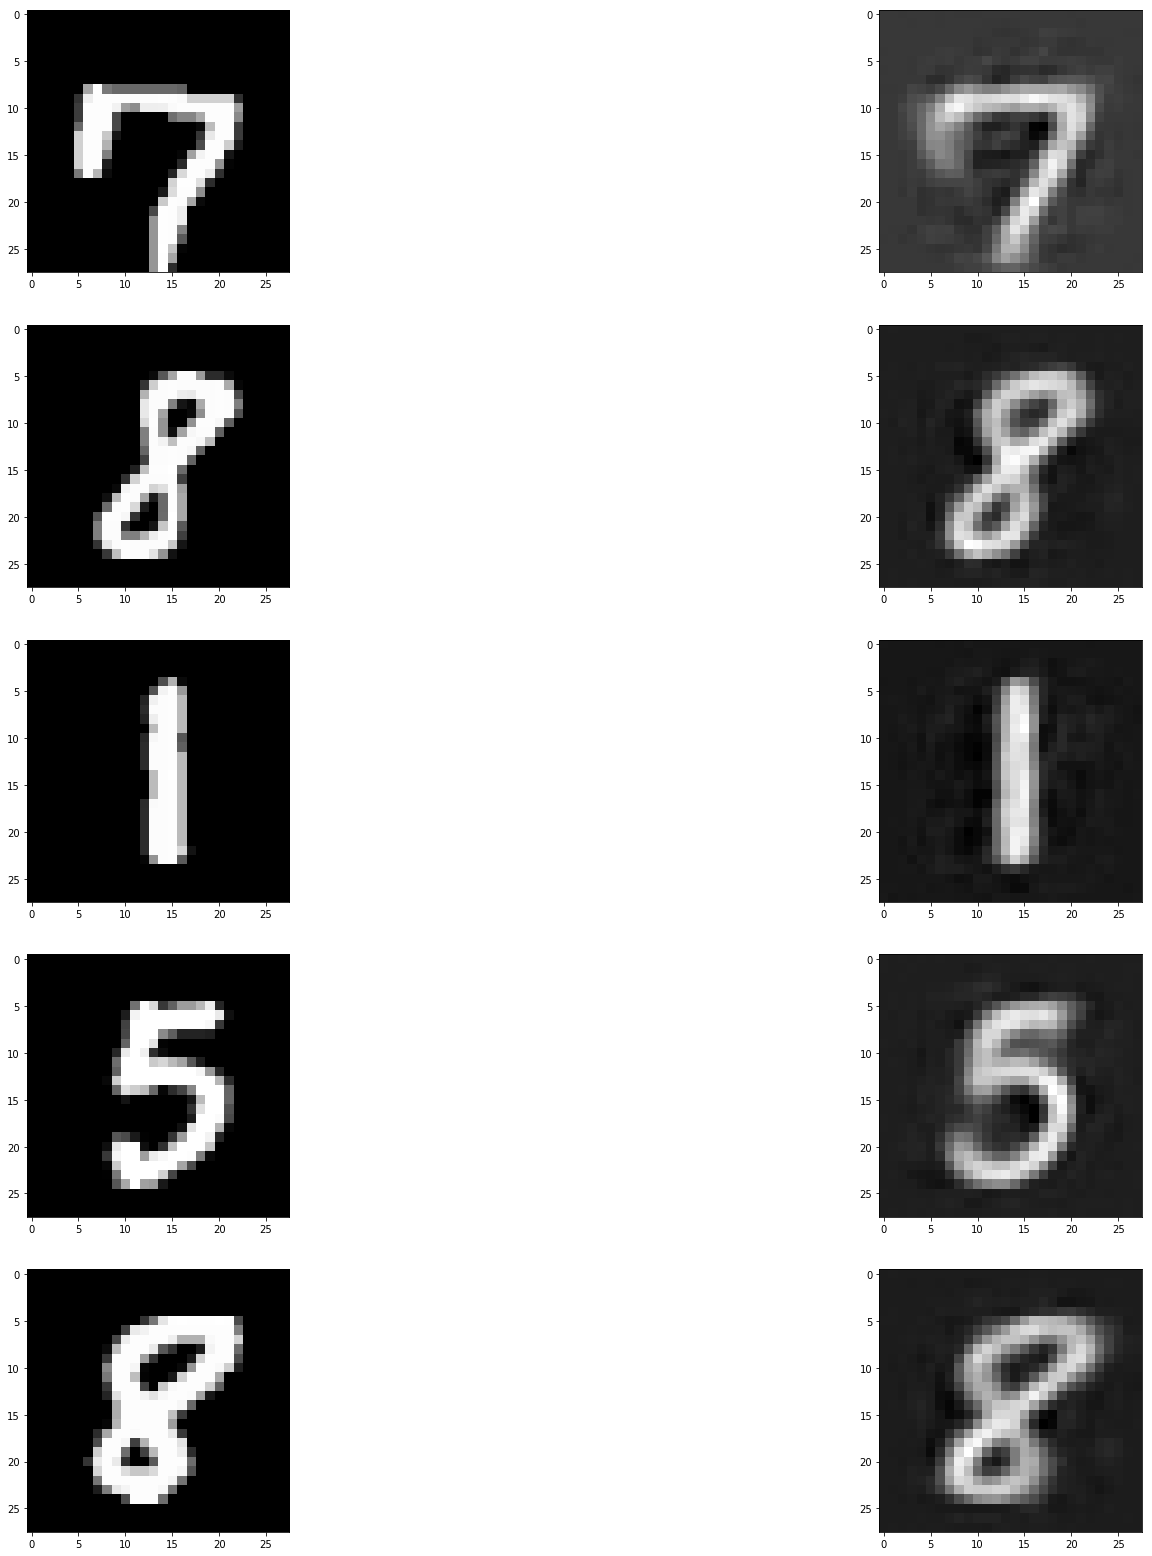

In [4]:
from sklearn.datasets import load_digits

IN_SIZE = 28 * 28
HIDDEN1_SIZE = 500
OUT_SIZE = 10

NEPOCHS = 25
LR = 1e-3
BATCH_SIZE = 64

X, y, X_test, y_test = utils.load_mnist_np('/tmp/data')
X = X.reshape(len(X), -1)
#X = X.astype(np.float32)

class Net(torch.nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.el1 = torch.nn.Linear(IN_SIZE , HIDDEN1_SIZE)
        self.el2 = torch.nn.Linear(HIDDEN1_SIZE, OUT_SIZE)
        self.dl1 = torch.nn.Linear(OUT_SIZE, HIDDEN1_SIZE)
        self.dl2 = torch.nn.Linear(HIDDEN1_SIZE, IN_SIZE)
        
    def encoder(self, x):
        x = torch.relu(self.el1(x))
        x = torch.relu(self.el2(x))
        return x
    
    def decoder(self, x):
        x = torch.relu(self.dl1(x))
        x = self.dl2(x)
        return x

    def forward(self, x):
        return self.decoder(self.encoder(x))


net = Net()
criterion = torch.nn.MSELoss(reduction='mean')
opti = torch.optim.Adam(net.parameters(), lr=LR)

for epoch in range(NEPOCHS):
    
    p = np.random.permutation(len(X))
    X = X[p]
    for ki in range(0, len(X), BATCH_SIZE):
        tX = torch.from_numpy(X[ki:ki+BATCH_SIZE])

        net.zero_grad()
        Xr = net(tX)
        loss = criterion(Xr, tX)
        loss.backward()
        opti.step()
    
    if epoch % 1 == 0:
        tX = torch.from_numpy(X)
        Xr = net(tX)
        loss = criterion(Xr, tX)
        print('Epoch {}: Loss = {}'.format(epoch+1, loss.data))
        


fig=plt.figure(figsize=(28, 28))
for i in range(5):
    X0 = X[i]
    X0r = net(torch.from_numpy(X0)).data.numpy()
    fig.add_subplot(5, 2, 2*i+1)
    plt.imshow(X0.reshape(28, 28), cmap='gray')
    fig.add_subplot(5, 2, 2*i+2)
    plt.imshow(X0r.reshape(28, 28), cmap='gray')

plt.show()

With multiple layers, it's usually difficult to optimize if the weights are randomly initialized, gradient descent found a poor local minima.  
It works well when the initial weights are close to to a good solution.  

The weights are initialized with unsupervised learning, by trainining a deep belief network on the data.  
The weights obtained correspond to the weights of the encoder. The DBF is unfolded (symmetry) to also get the weights of the decoder.  
The whole networs is then trained usually, with the weights from the DBF.